# Экзамен по дисциплине "Машинное обучение"

**1. Метод решающих деревьев в задачах классификации.**



**Ответ:** Основные понятия
Решающие деревья классифицируют данные, разбивая их на подмножества, основанные на значениях признаков. Структура дерева состоит из узлов:



  1.   Корневой узел: Начальная точка дерева, представляющая весь набор данных.
  2.   Внутренние узлы: Узлы, которые делят данные на подмножества по определенным признакам.
  3. Листовые узлы: Конечные узлы, которые содержат конечную классификацию или результат.


**Принцип работы :**
Алгоритм строит дерево путем рекурсивного разбиения набора данных. На каждом этапе выбирается признак, который наилучшим образом делит данные на подмножества, увеличивая "чистоту" разделений. Это достигается путем максимизации критериев, таких как информационная выгода или индекс Джини.

**Пример :**  Рассмотрим простой пример. У нас есть данные о людях и мы хотим предсказать, купят ли они конкретный продукт. Признаки включают возраст, доход, и наличие детей.

Начнем с корневого узла, который содержит все данные. Выбираем признак, который наилучшим образом делит данные. Далее создаем поддеревья для каждого значения признака (Например,  < 30 < 30-50 < 50 ). Повторяем процесс для каждого поддерева до тех пор, пока все данные в поддереве не будут отнесены к одному классу или не будут удовлетворены другие критерии остановки

Преимущества:

Простота и интерпретируемость: Деревья решений легко визуализировать и интерпретировать. Малая предобработка данных: Не требуется нормализация признаков. Обработка категориальных признаков: Деревья решений могут работать как с числовыми, так и с категориальными данными. Недостатки:

Переобучение: Деревья решений склонны к переобучению, особенно если не ограничить глубину дерева. Неустойчивость: Небольшие изменения в данных могут привести к совершенно разным деревьям. Сложные отношения: Деревья решений могут быть неэффективны для моделирования сложных зависимостей.

2. Загрузить встроенный в библиотеку sklearn датасет "Диабет". Построить модель регрессии с регуляризацией. Задать значения аргументов конструктора объекта модели, отличающиеся от значений по умолчанию. Пояснить смысл каждого аргумента.

In [ ]:
#импорт датасета "Диабет"
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка датасета "Диабет"
diabetes = load_diabetes()

# Преобразование данных в DataFrame
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = 0.1  # Параметр регуляризации
max_iter = 10000  # Максимальное число итераций для оптимизации
tol = 0.001  # Порог для определения сходимости

# Lasso-регрессия
lasso_model = Lasso(alpha=alpha, max_iter=max_iter, tol=tol)

# Обучение модели на обучающей выборке
lasso_model.fit(X_train_scaled, y_train)

# Прогнозирование на тестовой выборке
y_pred = lasso_model.predict(X_test_scaled)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


MSE: 2884.4532059205544


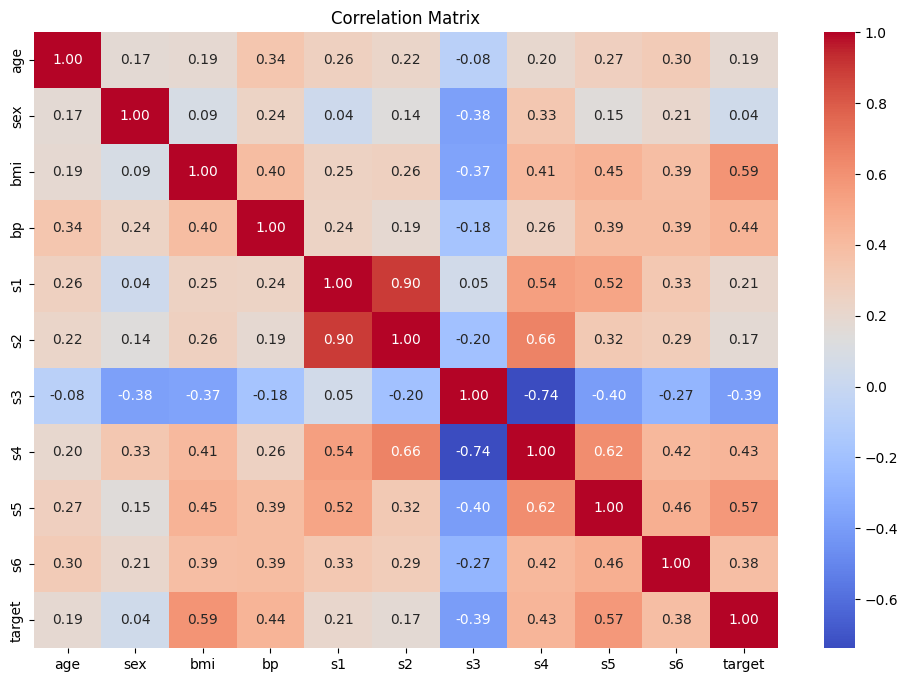

In [ ]:
# построение модели регрессии с регуляризацией
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Вычисление корреляции
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Пояснение смысла каждого аргумента:**

 bmi, bp, s4, и s5 показывают умеренную или сильную корреляцию с целевой переменной target. Однако, другие признаки, такие как sex, s1, и s2, имеют низкую корреляцию, что может снижать точность модели.



признаки s1 и s2(0,90) имеют вщаимную корреляцию между некоторомы признаками, что может указывать на мультиколлинеарность. Это может ухудшить производительность модели и привести к нестабильным оценкам коэффициентов, а это уже может увеличить количество потенциальных ошибок.